In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
%matplotlib notebook

In [4]:
data_bc = load_breast_cancer()
bc_data = data_bc.data
bc_labels = data_bc.target
bc_labels = np.reshape(bc_labels,(569,1))
bc_data = np.concatenate([bc_data,bc_labels],axis=1)

In [5]:
bc_df = pd.DataFrame(bc_data)

In [6]:
features = data_bc.feature_names
# features

In [7]:
features_labels = np.append(features,'label')

In [8]:
bc_df.columns = features_labels

In [9]:
# bc_df.head()

In [10]:
bc_df['label'].replace(0, 'Benign',inplace=True)
bc_df['label'].replace(1, 'Malignant',inplace=True)

In [11]:
x = bc_df.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [12]:
# np.mean(x),np.std(x)

(-6.826538293184326e-17, 1.0)

In [13]:
# feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [14]:
# normalised_bc = pd.DataFrame(x,columns=feat_cols)

In [15]:
pca = PCA(n_components=2)
pca_bc = pca.fit_transform(x)

In [16]:
pca_bc_df = pd.DataFrame(data = pca_bc
             , columns = ['First principal component', 'Second principal component'])

<IPython.core.display.Javascript object>


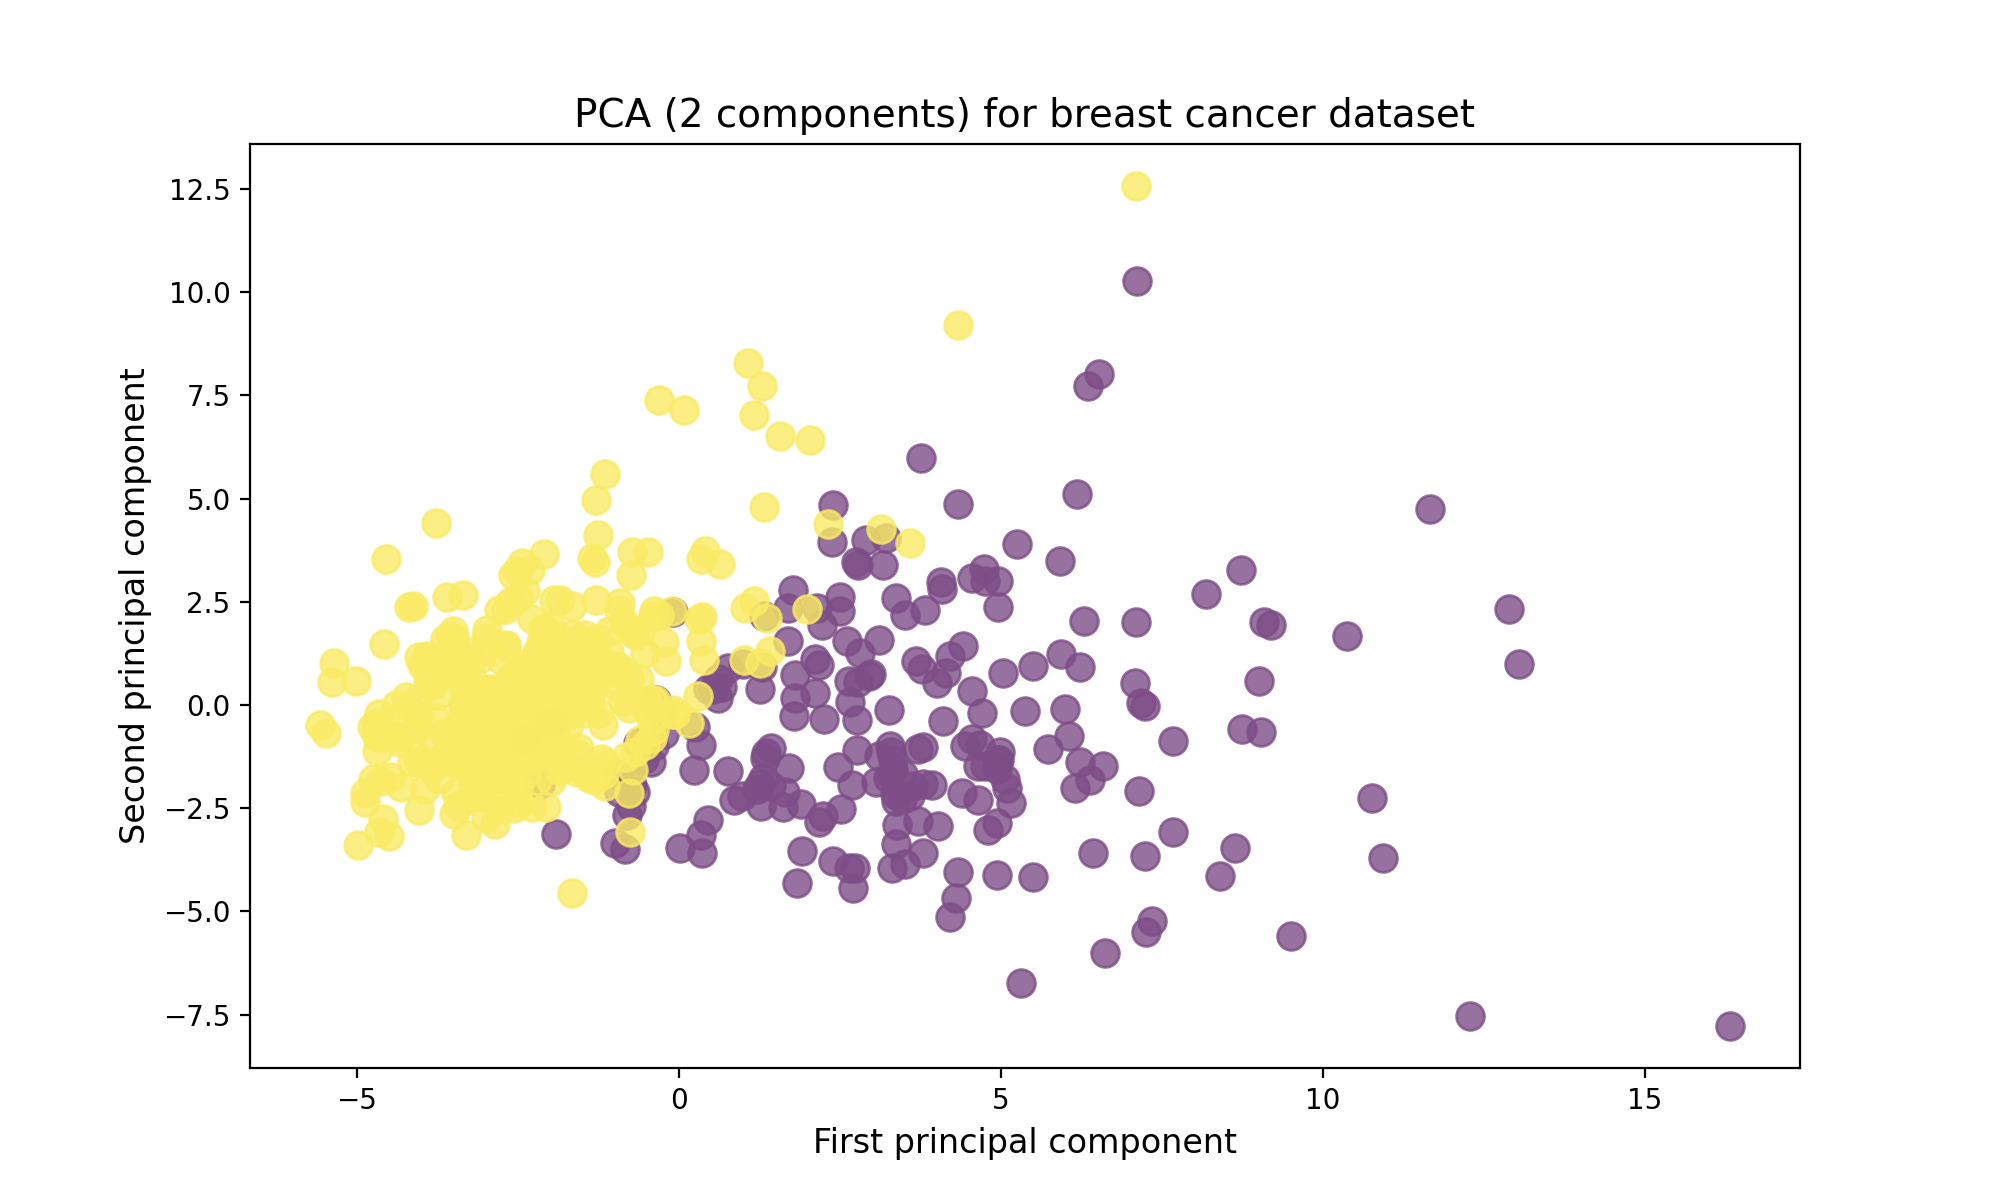

In [27]:
# plt.figure()
plt.figure(figsize=(10,6))
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=14)
plt.xlabel('First principal component',fontsize=12)
plt.ylabel('Second principal component',fontsize=12)
plt.title("PCA (2 components) for breast cancer dataset",fontsize=14)
targets = ['Benign', 'Malignant']
colors = ['#7D4D87', '#FAEB64']
# plt.scatter(principal_breast_Df.loc[indicesToKeep, 'First principal component'], 
#             principal_breast_Df.loc[indicesToKeep, 'Second principal component'], c = color, alpha=0.8, s = 100)
for target, color in zip(targets,colors):
    indicesToKeep = bc_df['label'] == target
    plt.scatter(pca_bc_df.loc[indicesToKeep, 'First principal component'], 
            pca_bc_df.loc[indicesToKeep, 'Second principal component'], c = color, alpha=0.8, s = 100)
# plt.legend(targets,prop={'size': 15})